## REAL ESTATE PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("REdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing['INDUS'].value_counts()

INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
2.25       1
2.01       1
4.15       1
1.89       1
2.02       1
Name: count, Length: 76, dtype: int64

In [7]:
housing['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

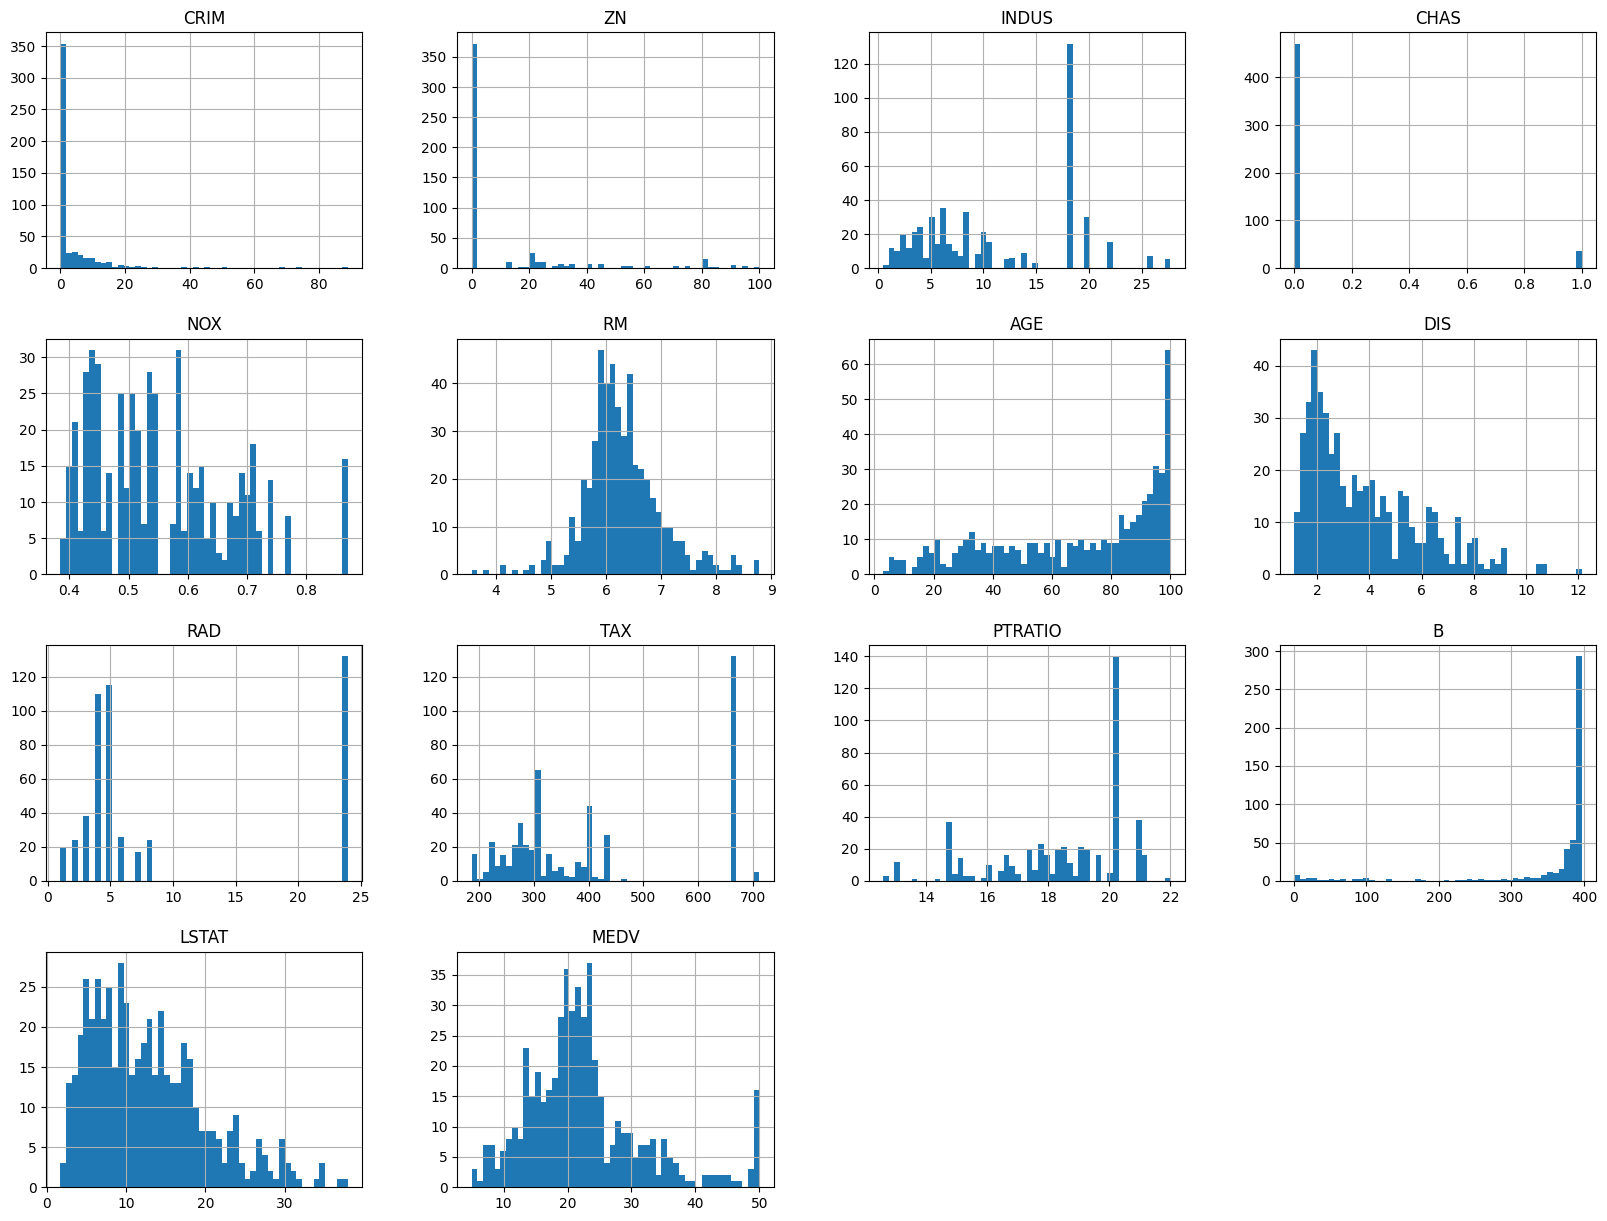

In [11]:
housing.hist(bins=50, figsize=(20,15))

## Train test splitting - Only for learning purpose

In [12]:
import numpy as np

In [13]:
def split_train_test(data, test_ratio):
    np.random.seed(42) #to fix the random values generation at one point of sequence so it wont be taking the test set data overtime by generating randomly
    shuffled = np.random.permutation(len(data))
    # print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

In [15]:
print(f"Rows in test Set : {len(test_set)} & \n Rows in train Set : {len(train_set)}")

Rows in test Set : 101 & 
 Rows in train Set : 405


In [16]:
from sklearn.model_selection  import train_test_split
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in test Set : {len(test_set)} & \n Rows in train Set : {len(train_set)}")

Rows in test Set : 102 & 
 Rows in train Set : 404


In [17]:
from sklearn.model_selection  import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [19]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [20]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [21]:
housing =  strat_train_set.copy()

# Looking for correlations

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

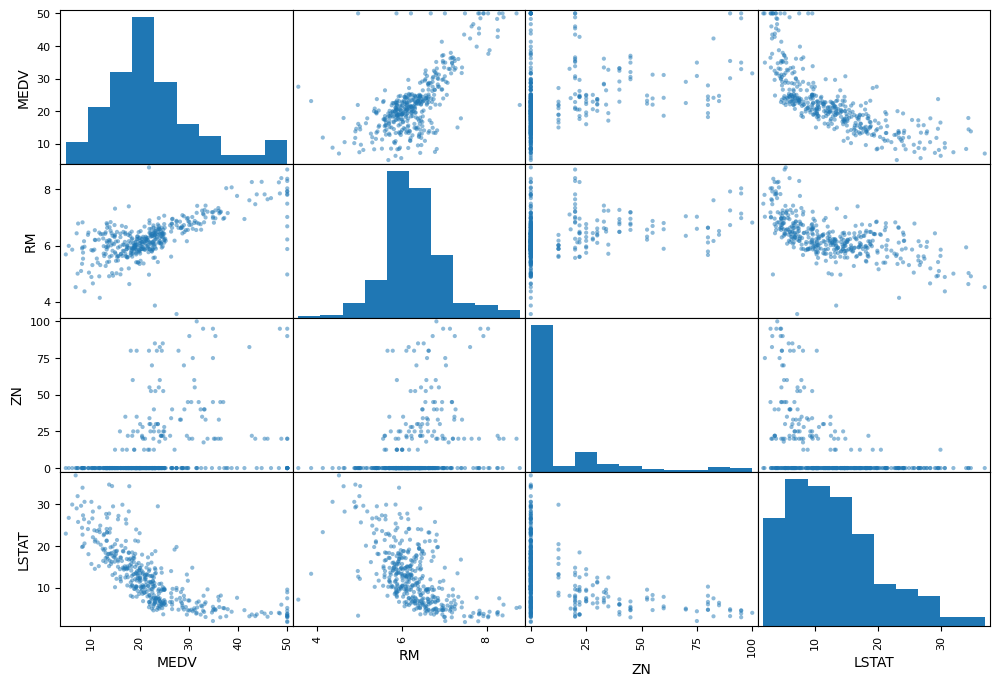

In [24]:
from pandas.plotting import scatter_matrix
attr = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attr], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

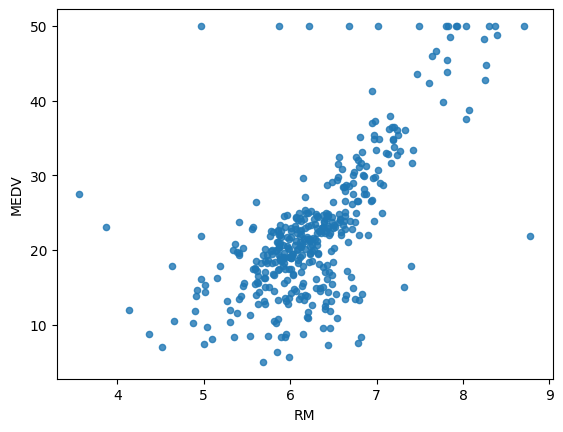

In [25]:
housing.plot(kind = "scatter",x="RM", y="MEDV", alpha =0.8)

# TRYING COMBINATIOMS

In [26]:
housing['TAXRM'] = housing['TAX']/housing['RM']

<Axes: xlabel='TAXRM', ylabel='MEDV'>

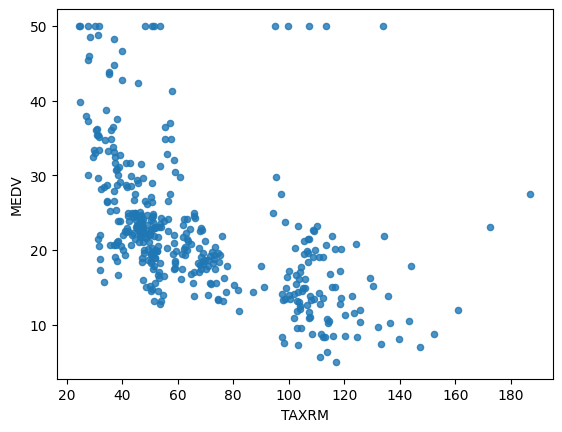

In [27]:
housing.plot(kind = "scatter",x="TAXRM", y="MEDV", alpha =0.8)

In [28]:
housing =  strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [29]:
housing_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

# Missing attribute values

## To get rid of missing attributes:
1. Get rid of the missing datapoints
2. Get rid of the attributes
3. set the missing value to some value(0, mean or median)

### functions That we will get to introduced to:
    1.dropna(subset="")|
    2.drop(" ", axis = <0/1>)
    3.fillna(median)

## Option 1:

### But the real matrix(housing) will remain unchanged

In [30]:
a = housing.dropna(subset='RM').shape
a
# option 1 from above

(404, 13)

##  Option 2:

In [31]:
housing.drop("RM", axis=1)
#option 2 from above which is removing rm

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


## But the real matrix(housing) will remain unchanged

In [32]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


## Option 3:

In [33]:
median =  housing["RM"].median()


In [34]:
median

np.float64(6.21)

In [35]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Now we will do this same thing using Scikit-Learn

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

## Now we will fill the Missing values with mean if there exist a missing value

In [39]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-Learn Design

### Primarily three types of objects 
#### 1.Estimators: which estimate some parameter based on dataset. it has fit and transform method
#### fit method -  fits the dataset amd calculate internal parameters

#### 2.transformers -  transform method takes input and outputs based on the learning from the fit().it also has a fit_transform() which fits
#### then transform.

#### 3.predictors - uses for linear regression, score(), fit() and predict() method.

# Creating pipelines

we will be using feature scalling - standarization (value - mean)/std

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scalar", StandardScaler()),
])

housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a Desired Model

Awesome! Let’s walk through a **visual example** using `.fit_transform()` on simple numeric data so you *see* what’s happening behind the scenes.

---

### 🔢 Imagine this tiny dataset of house sizes (in sq ft):

```python
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample training data
df = pd.DataFrame({
    'HouseSize': [1000, 1500, 2000, 2500, 3000]
})
```

So the data looks like:

| Index | HouseSize |
| ----- | --------- |
| 0     | 1000      |
| 1     | 1500      |
| 2     | 2000      |
| 3     | 2500      |
| 4     | 3000      |

---

### 🔧 Step 1: Apply `StandardScaler` with `fit_transform()`

```python
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
print(scaled)
```

Let’s break down what it does behind the scenes:

* Mean = (1000 + 1500 + 2000 + 2500 + 3000) / 5 = 2000
* Standard Deviation ≈ 707.11

Now it standardizes each value using:

$$
z = \frac{x - \text{mean}}{\text{std}}
$$

So:

| HouseSize | z = (x - 2000) / 707.11     |
| --------- | --------------------------- |
| 1000      | (1000 - 2000) / 707 ≈ -1.41 |
| 1500      | (1500 - 2000) / 707 ≈ -0.71 |
| 2000      | (2000 - 2000) / 707 = 0.0   |
| 2500      | (2500 - 2000) / 707 ≈ +0.71 |
| 3000      | (3000 - 2000) / 707 ≈ +1.41 |

So `scaled` will return:

```python
[[-1.41], [-0.71], [0.0], [0.71], [1.41]]
```

---

### 🔁 Cool twist: Now what if you add test data?

Let’s say you get a new house that’s 2250 sq ft:

```python
new_data = pd.DataFrame({'HouseSize': [2250]})
new_scaled = scaler.transform(new_data)
print(new_scaled)
```

Here it **won’t recalculate mean or std**. It just uses what it learned (mean=2000, std=707).

$$
(2250 - 2000)/707 ≈ +0.35
$$

So it prints:

```
[[0.35]]
```

---

### 🎯 Real-world magic?

You're turning *raw real-world numbers* into clean, uniform data that algorithms can digest with no bias from unit size or scale.

---

Want to try the same with multiple features (e.g., house size, age, income) and compare how each is scaled? I can whip that up too.


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
## model = DecisionTreeRegressor()
## model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)


array([22.508, 25.587, 16.363, 23.376, 23.391])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

Excellent thought — if you're asking something *very deep and insightful*:

> **"Wasn't the data already transformed? Why do we still need to predict? Isn't the transformed data the predicted value?"**

### 💡 Short Answer:

**No — transforming data ≠ prediction.**

Let’s explain clearly:

---

### 🔄 1. **Transforming the data** is just **preparing it**

When you did this:

```python
prepared_data = my_pipeline.transform(some_data)
```

You simply:

* **Filled in missing values** using the median (via `SimpleImputer`)
* **Scaled the values** using standardization (via `StandardScaler`)

So:

* You *cleaned* and *normalized* the input features
* But you **did NOT use the model yet**

> 🧠 Think of it like washing and chopping vegetables.
> You haven’t cooked the meal (made a prediction) yet.

---

### 🧠 2. **Prediction happens only when you pass the transformed data into the model**

```python
model.predict(prepared_data)
```

Now the model:

* Takes the clean, numerical feature vector
* Applies the learned math (in case of linear regression: $y = w_1x_1 + w_2x_2 + ... + b$)
* **Outputs the predicted target** — in this case, **house price**

---

### ✅ Analogy:

| Step           | Meaning                               |
| -------------- | ------------------------------------- |
| `.transform()` | Cleans + preps the input data         |
| `.predict()`   | Uses the model to output a prediction |

---

### 📊 Visual Example:

Assume original data (before transform):

| Bedrooms | Income | Age |
| -------- | ------ | --- |
| NaN      | 50000  | 10  |

After `.transform()`:

| Bedrooms | Income        | Age           |
| -------- | ------------- | ------------- |
| 3.0      | 0.42 (scaled) | -1.2 (scaled) |

But this is just **numerical input**, not the final prediction.

When you run `model.predict(...)`, then you might get:

```python
Predicted house price: ₹25,00,000
```

---

### ✅ Summary:

| Action              | Result                                   |
| ------------------- | ---------------------------------------- |
| `.transform()`      | Cleans and preps input data              |
| `.predict()`        | Produces predicted output                |
| Output of transform | Still **input features**, not prediction |

---




# Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [47]:
rmse

np.float64(1.1631531338870584)

In [48]:
mse

1.3529252128712854

In [49]:
mean_price = housing_labels.mean()

In [50]:
Relative_error = (rmse/mean_price)*100 
Relative_error

np.float64(5.1674092908396005)

As we got 0 relative error, more likely 0 rmse, it means it got ovefitted

# Using better evaluation technique - Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 8 9 10
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.79289168, 2.69441597, 4.40018895, 2.56972379, 3.33073436,
       2.62687167, 4.77007351, 3.27403209, 3.38378214, 3.16691711])

In [53]:
def print_scores(scores):
    print("scores :", scores)
    print("mean :", scores.mean())
    print("standard deviation :", scores.std())    

In [54]:
print_scores(rmse_scores)

scores : [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
 4.77007351 3.27403209 3.38378214 3.16691711]
mean : 3.3009631251857217
standard deviation : 0.7076841067486248


# Saving the model

In [55]:
from joblib import dump, load
dump(model, "ESTATE_PRICE_CALCULATOR.joblib")

['ESTATE_PRICE_CALCULATOR.joblib']

## Testing the model on test data

In [56]:
X_test =  strat_test_set.drop("MEDV", axis = 1)
Y_test = x_test =  strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [57]:
final_rmse

np.float64(2.948844070638726)

In [58]:
## print(final_prediction, list(Y_test))

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])